In [227]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [228]:
data = pd.read_csv('1.Datasets\Social_Network_Ads.csv')
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [229]:
data.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [230]:
data = data.drop(['User ID'], axis=1)
data

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


In [231]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [232]:
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0
...,...,...,...,...
395,0,46,41000,1
396,1,51,23000,1
397,0,50,20000,1
398,1,36,33000,0


In [233]:
x = data.drop('Purchased', axis=1)
y = data['Purchased']

In [234]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [235]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(ccp_alpha=0.01)
model.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.01)

In [236]:
model.get_params()

{'ccp_alpha': 0.01,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [237]:
predict = model.predict(x_test)
predict

array([1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1], dtype=int64)

In [238]:
model.predict_proba(x_test)

array([[0.17894737, 0.82105263],
       [0.97368421, 0.02631579],
       [0.97368421, 0.02631579],
       [0.17142857, 0.82857143],
       [0.97368421, 0.02631579],
       [0.17894737, 0.82105263],
       [0.97368421, 0.02631579],
       [0.97368421, 0.02631579],
       [0.97368421, 0.02631579],
       [0.97368421, 0.02631579],
       [0.97368421, 0.02631579],
       [0.17894737, 0.82105263],
       [0.17894737, 0.82105263],
       [0.17142857, 0.82857143],
       [0.97368421, 0.02631579],
       [0.97368421, 0.02631579],
       [0.97368421, 0.02631579],
       [0.17142857, 0.82857143],
       [0.17894737, 0.82105263],
       [0.97368421, 0.02631579],
       [0.97368421, 0.02631579],
       [0.97368421, 0.02631579],
       [0.97368421, 0.02631579],
       [0.17894737, 0.82105263],
       [0.17894737, 0.82105263],
       [0.97368421, 0.02631579],
       [0.97368421, 0.02631579],
       [0.17142857, 0.82857143],
       [0.97368421, 0.02631579],
       [0.17894737, 0.82105263],
       [0.

In [239]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, classification_report

print(f'Accuracy: {accuracy_score(y_test, predict)}')
print(f'confusion_matrix:\n {confusion_matrix(y_test, predict)}')
print(f'precision_score: {precision_score(y_test, predict)}')
print(f'recall_score: {recall_score(y_test, predict)}')
print(f"classification_report:\n {classification_report(y_test, predict, target_names=['Purchases', 'No Purchase'])}")

Accuracy: 0.925
confusion_matrix:
 [[47  2]
 [ 4 27]]
precision_score: 0.9310344827586207
recall_score: 0.8709677419354839
classification_report:
               precision    recall  f1-score   support

   Purchases       0.92      0.96      0.94        49
 No Purchase       0.93      0.87      0.90        31

    accuracy                           0.93        80
   macro avg       0.93      0.92      0.92        80
weighted avg       0.93      0.93      0.92        80



[Text(669.5999999999999, 453.0, 'X[1] <= 42.5\ngini = 0.455\nsamples = 320\nvalue = [208, 112]\nclass = Not Purchased'),
 Text(446.4, 271.8, 'X[2] <= 90500.0\ngini = 0.257\nsamples = 225\nvalue = [191, 34]\nclass = Not Purchased'),
 Text(223.2, 90.59999999999997, 'gini = 0.051\nsamples = 190\nvalue = [185, 5]\nclass = Not Purchased'),
 Text(669.5999999999999, 90.59999999999997, 'gini = 0.284\nsamples = 35\nvalue = [6, 29]\nclass = Purchased'),
 Text(892.8, 271.8, 'gini = 0.294\nsamples = 95\nvalue = [17, 78]\nclass = Purchased')]

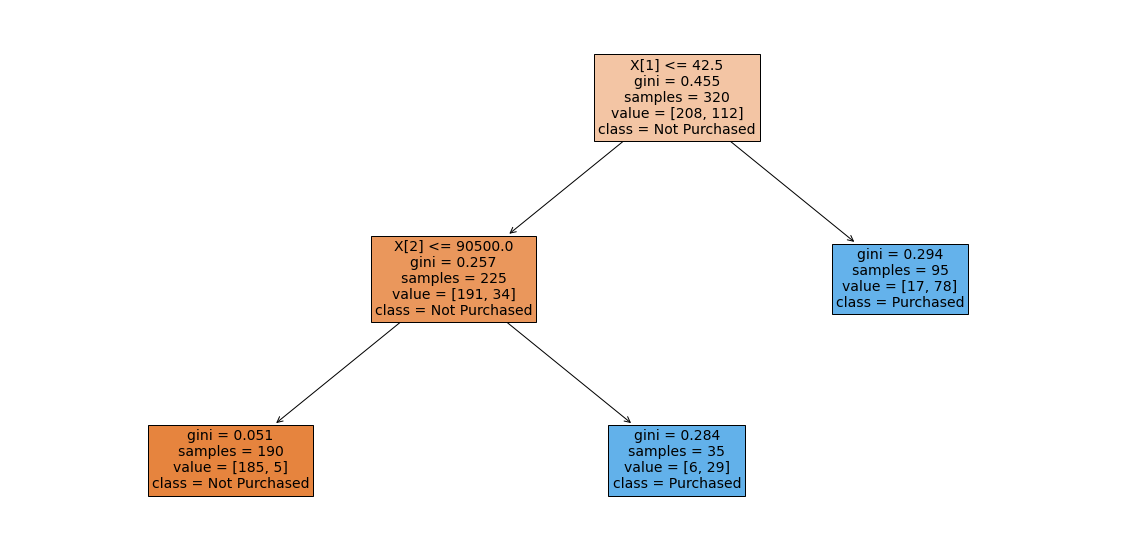

In [240]:
from sklearn import tree
fig = plt.figure(figsize=(20, 10))
tree.plot_tree(model, class_names={0: 'Not Purchased', 1:'Purchased'},
               filled=True,
               fontsize=14)